**Assignment Day 6**

**Done By Gunjan Chakraborty**

**USN: 22MSRDS007**

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Dataset loading

In [3]:

df = pd.read_csv("D:/Chools/Day_05/Toyoto_Corrola.csv")

# **Summary statistics**

In [4]:
print(df.head())

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

      KM  HP  Doors  Cylinders  Gears  Weight  
0  46986  90      3          4      5    1165  
1  72937  90      3          4      5    1165  
2  41711  90      3          4      5    1165  
3  48000  90      3          4      5    1165  
4  38500  90      3          4      5    1170  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   objec

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB
None


In [6]:
print(df.describe())

                Id         Price    Age_08_04             KM           HP  \
count  1436.000000   1436.000000  1436.000000    1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075   68533.259749   101.502089   
std     416.476890   3626.964585    18.599988   37506.448872    14.981080   
min       1.000000   4350.000000     1.000000       1.000000    69.000000   
25%     361.750000   8450.000000    44.000000   43000.000000    90.000000   
50%     721.500000   9900.000000    61.000000   63389.500000   110.000000   
75%    1081.250000  11950.000000    70.000000   87020.750000   110.000000   
max    1442.000000  32500.000000    80.000000  243000.000000   192.000000   

             Doors  Cylinders        Gears      Weight  
count  1436.000000     1436.0  1436.000000  1436.00000  
mean      4.033426        4.0     5.026462  1072.45961  
std       0.952677        0.0     0.188510    52.64112  
min       2.000000        4.0     3.000000  1000.00000  
25%       3.000000   

# **EDA**

### Visualizing relations using pairplot

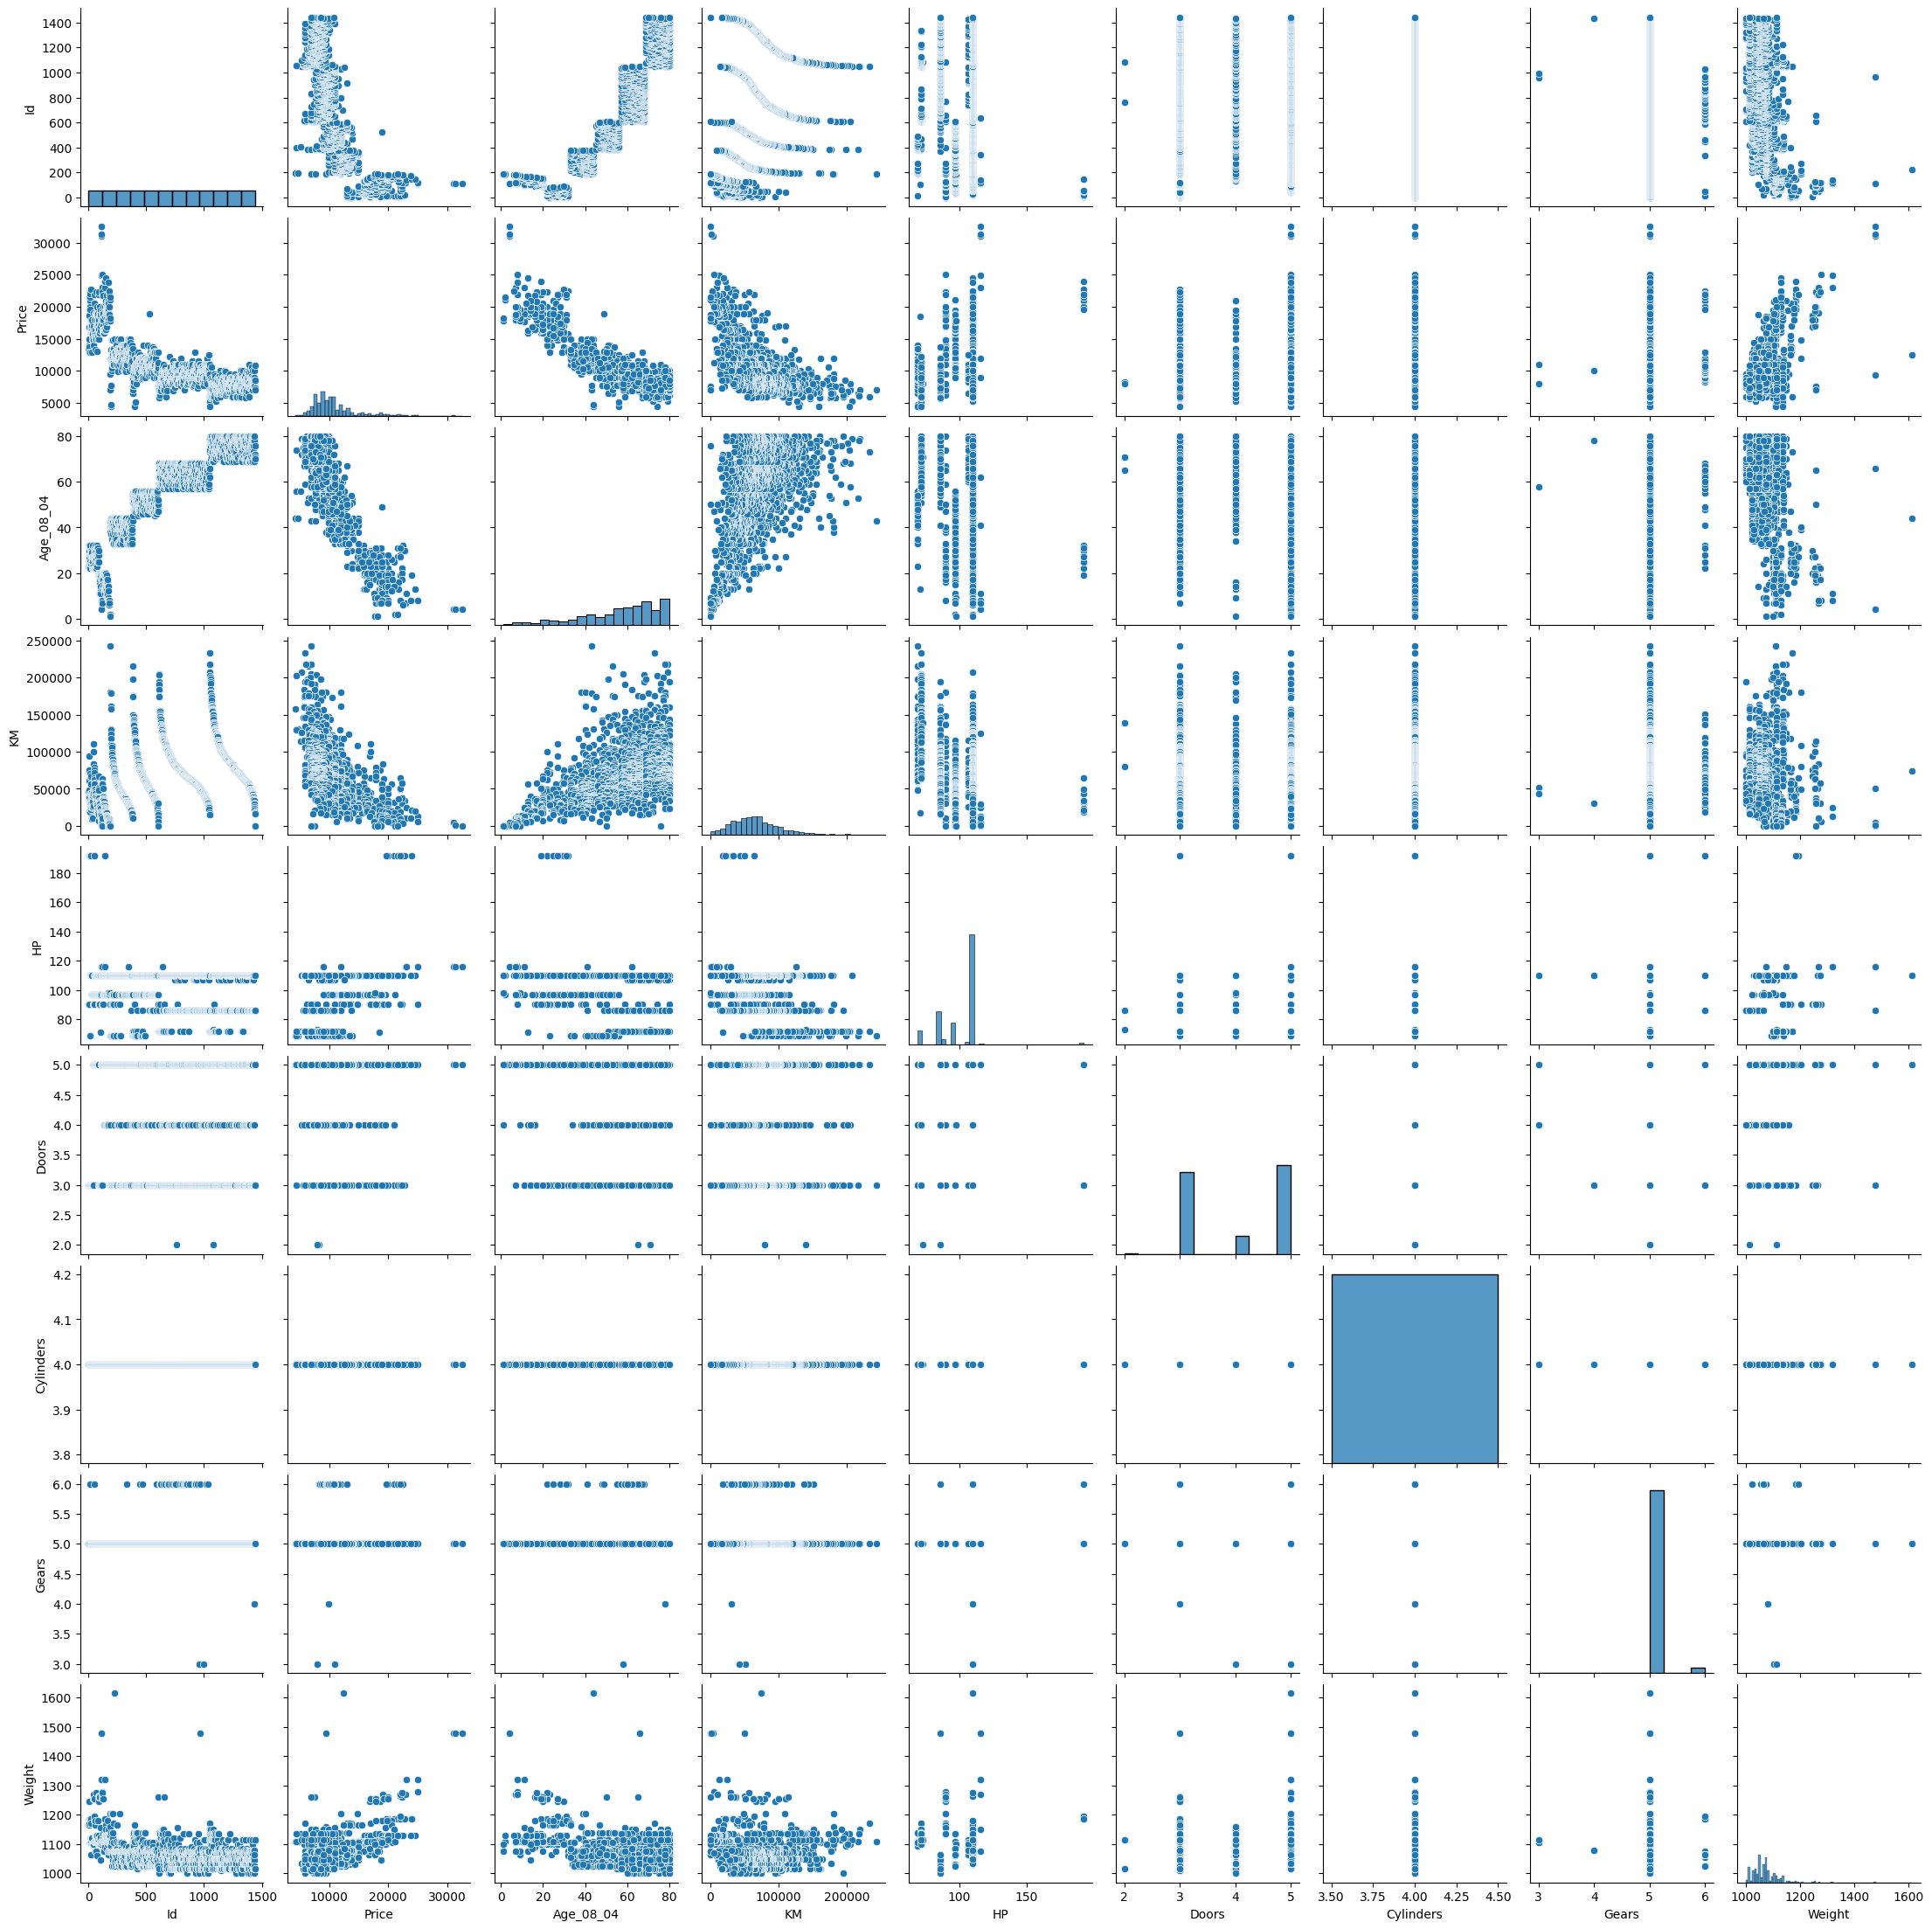

In [7]:
sns.pairplot(df)
plt.show()

In [ ]:
def calculate_vif(df):
    # Drop rows with missing values
    df = df.dropna()
    # Exclude non-numeric columns if present
    numeric_data = df.select_dtypes(include=[np.number])
    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_data.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(len(numeric_data.columns))]
    return vif_data

# Print VIF values
print(calculate_vif(df.drop(columns=['Price'])))


     feature          VIF
0         Id     8.005702
1  Age_08_04    11.369412
2         KM     2.284494
3         HP     1.225300
4      Doors     1.150013
5  Cylinders  1393.363998
6      Gears     1.103299
7     Weight     1.581996


1. **Id**: The VIF for the 'Id' feature is 8.005702, which indicates a moderate level of multicollinearity. While not extremely high, it suggests that there might be some correlation between the 'Id' feature and other independent variables.

2. **Age_08_04**: The VIF for 'Age_08_04' is 11.369412, indicating some level of multicollinearity with other variables. This suggests that the age of the car ('Age_08_04') may be correlated with other factors in the dataset.

3. **KM**: The VIF for 'KM' is 2.284494, which is relatively low and suggests that there is not much multicollinearity between the 'KM' feature and other variables.

4. **HP**: The VIF for 'HP' is 1.225300, indicating a low level of multicollinearity. This suggests that the horsepower ('HP') of the car is not highly correlated with other variables in the dataset.

5. **Doors**: The VIF for 'Doors' is 1.150013, indicating a low level of multicollinearity. This suggests that the number of doors ('Doors') in the car is not highly correlated with other variables in the dataset.

6. **Cylinders**: The VIF for 'Cylinders' is 1393.363998, which is extremely high. This indicates a significant multicollinearity issue with the 'Cylinders' feature and suggests that it might need to be addressed in the model.

7. **Gears**: The VIF for 'Gears' is 1.103299, indicating a low level of multicollinearity. This suggests that the number of gears ('Gears') in the car is not highly correlated with other variables in the dataset.

8. **Weight**: The VIF for 'Weight' is 1.581996, indicating a moderate level of multicollinearity. While not extremely high, it suggests that there might be some correlation between the weight of the car ('Weight') and other independent variables.

In summary, the VIF values provide insights into the level of multicollinearity between each feature and other independent variables in the dataset. Features with high VIF values, such as 'Cylinders' and 'Age_08_04', we need to address multicollinearity issues in our regression model.

# **Model Building and Training**

In [ ]:
#Preparing the Model Simple Linear Regression
model = smf.ols('Price ~ Age_08_04 + KM + HP', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     2039.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:40:58   Log-Likelihood:                -12613.
No. Observations:                1436   AIC:                         2.523e+04
Df Residuals:                    1432   BIC:                         2.526e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.645e+04    351.717     46.771      0.0

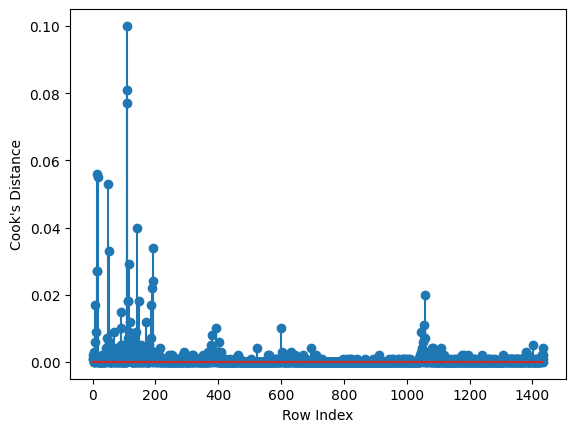

In [ ]:
#Model Deletion Diagnostics
# Checking for influential points using Cook's distance
influence = model.get_influence()
(c, _) = influence.cooks_distance
# Plot Cook's distance
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")
plt.show()

In [ ]:
# Improving the Model
# Handle influential points or outliers if necessary
# For example, you can remove influential points based on Cook's distance
outlier_threshold = 4 / len(df)  # Adjust the threshold as needed
outliers = np.where(c > outlier_threshold)[0]
print("Outliers (indices):", outliers)
# Remove outliers from the dataset if needed

Outliers (indices): [   7    8   10   13   14   15   16   43   45   46   49   52   53   68
   74   89   91   92   95  109  110  111  112  113  114  115  116  118
  119  121  125  138  141  146  147  149  154  161  167  171  174  178
  179  184  185  186  187  189  191  192  215  292  370  378  379  380
  387  388  393  395  402  410  523  601  604  696 1045 1046 1049 1050
 1052 1054 1058 1059 1066 1079 1081 1082 1085 1109 1378 1402 1432]


In [ ]:
df_clean = df.drop(outliers)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

# Print VIF values
print(calculate_vif(df_clean[['Age_08_04', 'KM','HP','Doors', 'Cylinders', 'Gears', 'Weight']]))


     feature          VIF
0  Age_08_04     1.740543
1         KM     1.590903
2         HP     1.134564
3      Doors     1.184418
4  Cylinders  1677.406823
5      Gears     1.058125
6     Weight     1.424192


The VIF values provide insights into the degree of multicollinearity between the independent variables (features) in the Toyota Corolla dataset. Here's an interpretation of the VIF values for each feature:

1. **Age_08_04**:
   - **VIF**: 1.74
   - **Insight**: The VIF value for Age_08_04 is relatively low (less than 5), indicating that there is no significant multicollinearity between this feature and the other independent variables. This suggests that Age_08_04 is relatively independent and does not duplicate information provided by other features.

2. **KM**:
   - **VIF**: 1.59
   - **Insight**: Similar to Age_08_04, the VIF for KM is low, indicating low multicollinearity. KM is also relatively independent of the other features in the dataset.

3. **HP**:
   - **VIF**: 1.13
   - **Insight**: The VIF for HP is close to 1, indicating very low multicollinearity. HP is independent of the other features and does not duplicate information provided by them.

4. **Doors**:
   - **VIF**: 1.18
   - **Insight**: The VIF for Doors is low, indicating low multicollinearity. Doors is relatively independent of the other features in the dataset.

5. **Cylinders**:
   - **VIF**: 1677.41
   - **Insight**: The VIF for Cylinders is very high, indicating a significant degree of multicollinearity with the other independent variables. This suggests that Cylinders may be highly correlated with other features, potentially causing issues in the regression model.

6. **Gears**:
   - **VIF**: 1.06
   - **Insight**: The VIF for Gears is low, indicating low multicollinearity. Gears is relatively independent of the other features in the dataset.

7. **Weight**:
   - **VIF**: 1.42
   - **Insight**: The VIF for Weight is low, indicating low multicollinearity. Weight is relatively independent of the other features in the dataset.

In summary, most of the features in the Toyota Corolla dataset have low VIF values, indicating low multicollinearity and a high degree of independence from each other. However, the feature "Cylinders" stands out with an extremely high VIF, suggesting a potential issue of multicollinearity that may need to be addressed in the regression model.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[['Age_08_04', 'KM', 'HP']])


**Standardization of Data**:
   - The `StandardScaler` from scikit-learn is used to standardize the independent variables 'Age_08_04', 'KM', and 'HP' to have a mean of 0 and a standard deviation of 1. This is important for PCA, as it requires the data to be centered at 0 and have a uniform scale.
   - The standardized data is stored in the variable `X_scaled`.

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=3)  # Retain all principal components for now
X_pca = pca.fit_transform(X_scaled)


**Principal Component Analysis (PCA)**:
   - The `PCA` class from scikit-learn is used to perform PCA on the standardized data `X_scaled`.
   - `n_components=3` specifies that PCA should retain all principal components (equal to the number of input features) for now. Each principal component is a linear combination of the original features that captures the maximum variance in the data.
   - The `fit_transform` method is used to both fit the PCA model to the data and transform the data into the principal component space. The transformed data is stored in the variable `X_pca`.

In [ ]:
# Check variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.53698187, 0.31033986, 0.15267827])

After fitting the PCA model to the data, you can access the explained_variance_ratio_ attribute of the PCA object to see the proportion of variance explained by each principal component.
The output array [0.53698187, 0.31033986, 0.15267827] indicates that the first principal component explains approximately 53.7% of the variance in the data, the second component explains 31.0%, and the third component explains 15.3%.

In [ ]:
# Use retained principal components in the regression model
model_pca = sm.OLS(df_clean['Price'], sm.add_constant(X_pca)).fit()
model_pca

The output suggests that the first principal component captures the most variance in the data, followed by the second and third components.
These ratios indicate the relative importance of each principal component in explaining the variability of the original variables.

In the context of your analysis, you can use this information to decide how many principal components to retain based on the amount of variance explained and the desired level of dimensionality reduction.

In summary, the code applies PCA to the standardized independent variables and provides insights into the variance explained by each principal component, which can be crucial for dimensionality reduction and understanding the underlying structure of the data.

In [ ]:
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     2378.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:42:04   Log-Likelihood:                -11501.
No. Observations:                1353   AIC:                         2.301e+04
Df Residuals:                    1349   BIC:                         2.303e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.042e+04     32.382    321.665      0.0

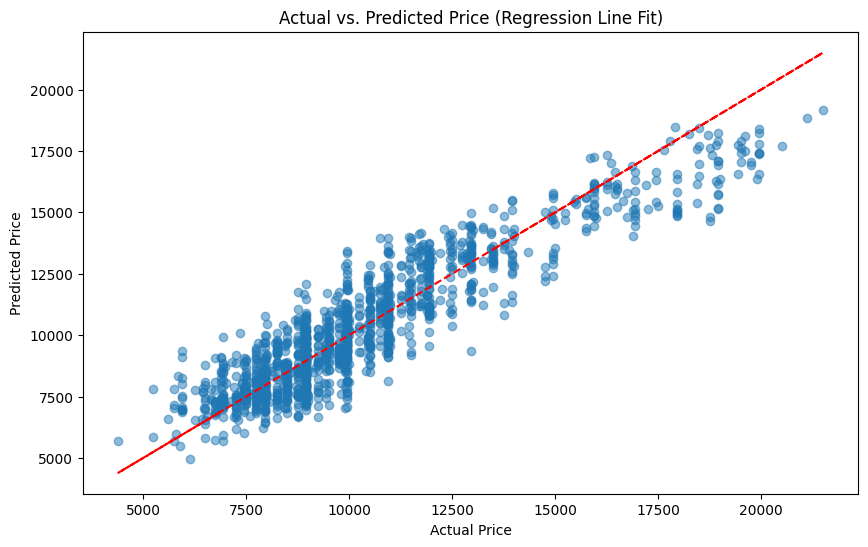

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Add a constant term for the intercept
X_pca_const = sm.add_constant(X_pca)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Price'], model_pca.predict(X_pca_const), alpha=0.5)
plt.plot(df_clean['Price'], df_clean['Price'], color='red', linestyle='--')  # Add a diagonal line for reference
plt.title('Actual vs. Predicted Price (Regression Line Fit)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

 The Scatter plot is reflecting positive relationship between the two variables, which means that the model is doing a good job of predicting the actual prices. The closer the points are to the regression line, the better the predictions are.

Overall, this graph is a positive indicator of the model's performance. It suggests that the model is able to capture the underlying relationship between the variables and make accurate predictions.

The scatter plot shows some spread around the regression line. This is to be expected, as no model is perfect. However, the spread is not too wide, which suggests that the model is still doing a good job.
The regression line is not perfectly straight. This suggests that the relationship between the variables is not linear. However, the line is still a good approximation of the relationship, and the model is still able to make accurate predictions.